# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install plotnine

In [3]:
import pandas as pd
from plotnine import *

# 상가업소정보 2017년 9월

In [6]:
# 상가업소정보 2017년 9월 데이터
shop_201709_01 = pd.read_csv('shop_201709_01.csv', encoding='cp949')
shop_201709_01.shape

(460822, 39)

In [15]:
shop_201709_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774


In [8]:
shop_201709_01.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
460819,15898705,팝콘피씨,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1121510700101710000026151,NaN,서울특별시 광진구 광나루로26길 40,143926,5022.0,NaN,1,NaN,127.078059,37.545272
460820,15883107,키즈코코,NaN,D,소매,D05,의복의류,D05A05,아동복판매,G47416,...,2614010600101660006000001,대신롯데캐슬,부산광역시 서구 대티로 161,602093,49208.0,NaN,NaN,NaN,129.010414,35.116648
460821,15915239,하서족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,2671025622107170008000001,서진프라자,부산광역시 기장군 정관읍 정관7로 34,619963,46015.0,NaN,NaN,107,129.178633,35.321823


In [16]:
# 생각보다 결측치가 많다.
shop_201709_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          405614
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      25931
표준산업분류명       27032
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         77841
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        399010
건물관리번호            0
건물명          258433
도로명주소             0
구우편번호             0
신우편번호            11
동정보          416558
층정보          199326
호정보          388686
경도                2
위도                2
dtype: int64

In [17]:
shop_201709_01.loc[shop_201709_01['위도'].isnull()]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
275711,6019251,파워라인휘트니스클럽,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,V0000000000000259889,NaN,서울특별시 성북구 서경로11길 0,136840,NaN,NaN,NaN,NaN,NaN,NaN
291170,24111979,파워라인휘트니스클럽,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,V0000000000000197124,NaN,서울특별시 성북구 서경로11길 0,136103,2708.0,NaN,NaN,6,NaN,NaN


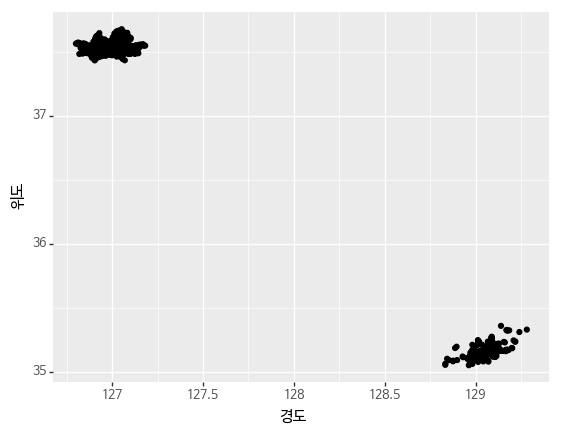

<ggplot: (-9223371899867081258)>

In [18]:
# 모든 데이터를 한번에 찍으면 너무 오래 걸려서 1000개만 찍어봅니다.
# 양쪽에 데이터가 몰려있는데 왜 그런지 주소 정보를 다시보겠습니다.
(ggplot(shop_201709_01[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [19]:
# 데이터를 보니 서울과 부산만 있는거 같습니다. 
# 그래서 서울과 그 외 데이터로 나눠봤습니다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(324817, 39)
(136005, 39)


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


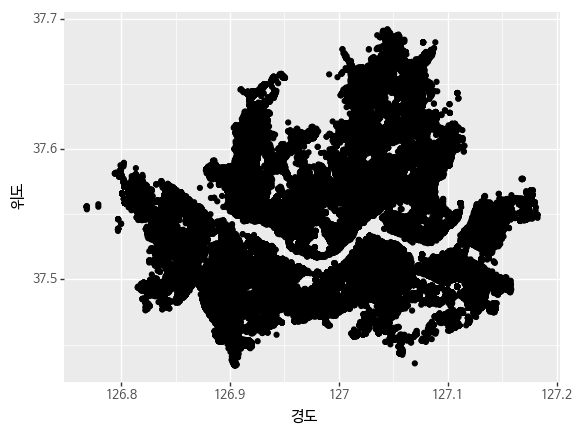

<ggplot: (136979487222)>

In [20]:
# 서울만 찍어봤더니 서울지도 비슷하게 나옵니다.
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [21]:
print(shop_201709_01.shape)
shop_201709_01['시도'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[0]
shop_201709_01['구군'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[1]
print(shop_201709_01.shape)
shop_201709_01.columns

(460822, 39)
(460822, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [22]:
# 서울만 찍어봤더니 서울지도 비슷하게 나옵니다.
# 서울 DF을 다시 만들어 줍니다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(324817, 41)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


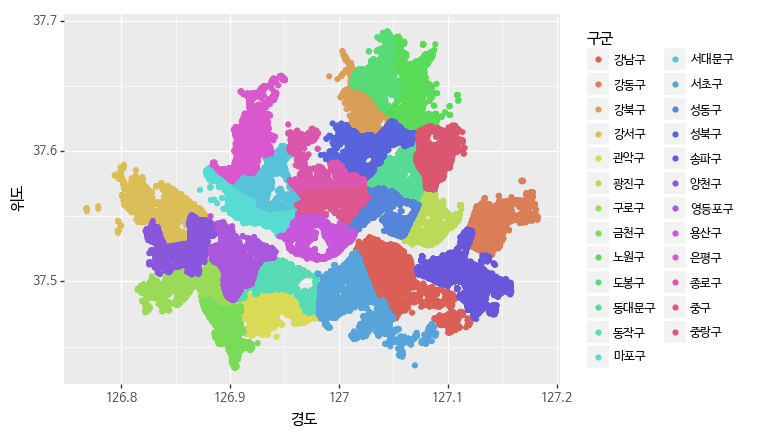

<ggplot: (-9223371899934234017)>

In [23]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [24]:
shop_seoul['상권업종대분류명'].value_counts()

소매          110843
음식          106023
생활서비스        52821
학문/교육        26712
부동산          13285
관광/여가/오락      9383
스포츠           3124
숙박            2626
Name: 상권업종대분류명, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


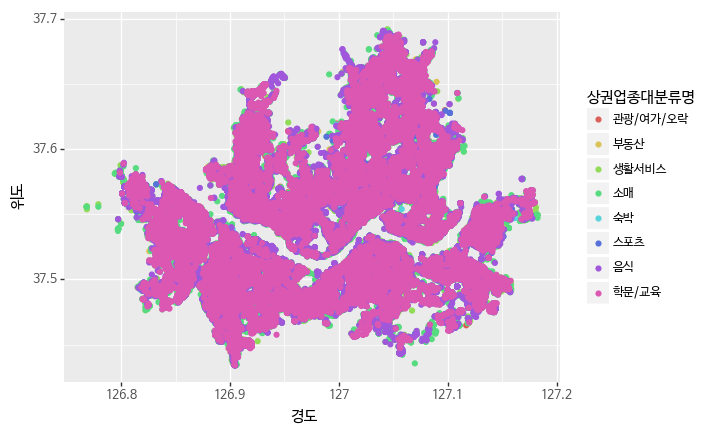

<ggplot: (136919135496)>

In [26]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='상권업종대분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## 학문/교육과 관련된 지도 보기

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


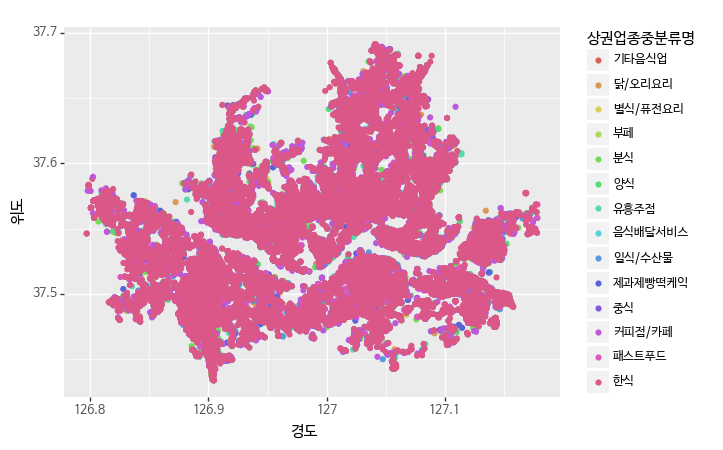

<ggplot: (-9223371899885294634)>

In [44]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '음식']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [45]:
shop_seoul_edu['상권업종중분류명'].value_counts()

한식         33623
커피점/카페     14516
유흥주점       13484
분식         10872
일식/수산물      7336
닭/오리요리      6059
양식          5227
패스트푸드       4609
제과제빵떡케익     4446
별식/퓨전요리     2558
중식          2551
부페           371
기타음식업        284
음식배달서비스       87
Name: 상권업종중분류명, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


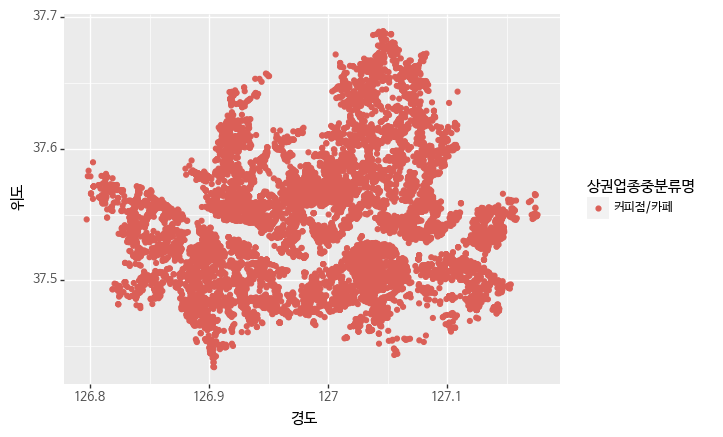

<ggplot: (136972057001)>

In [49]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '커피점/카페']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [50]:
shop_seoul_edu.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [51]:
!pip install folium

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import matplotlib as mpl
# path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=50).get_family()

# print(font_name)


# mpl.font_manager._rebuild()
# plt.rc('font', family=font_name)

# print ('설정파일 위치: ', mpl.matplotlib_fname())

In [55]:
import folium
geo_df = shop_seoul_edu
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    park_name = geo_df['상호명'][n] + ' - ' + geo_df['도로명주소'][n]
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], popup=park_name).add_to(map)
    
map

KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


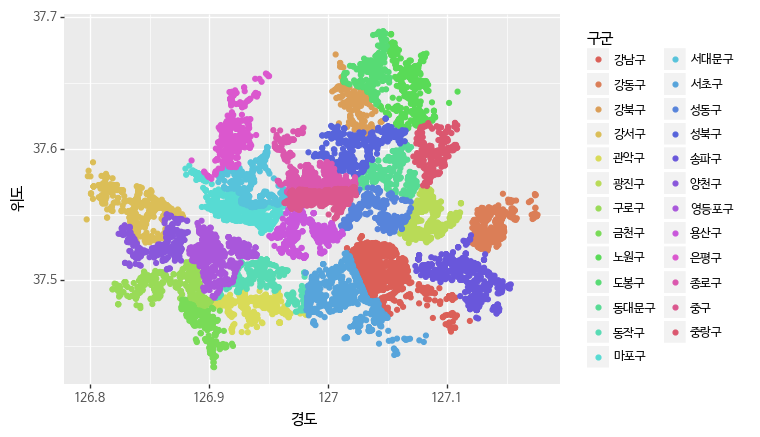

<ggplot: (-9223371899801915420)>

In [56]:
shop_seoul_eat = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '커피점/카페']

(ggplot(shop_seoul_eat)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

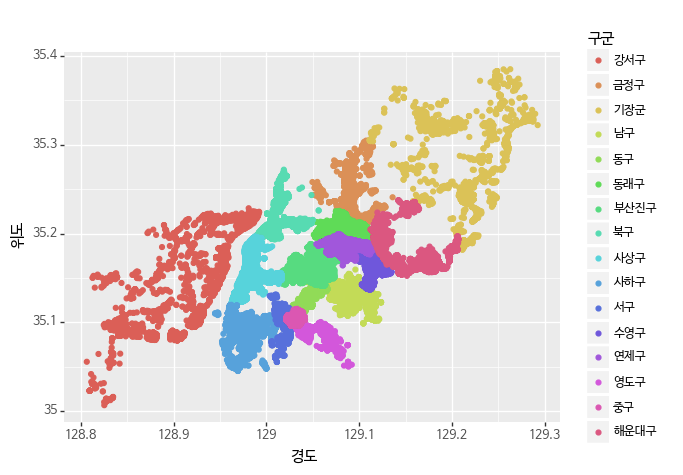

<ggplot: (136980068086)>

In [38]:
# 부산만 있는거 같습니다.
# 서울만 제외한 나머지 지역으로 DF을 다시 생성해 줍니다.
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
(ggplot(shop_except_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)